## Summary

This tutorial uses napari 0.4.15.<br>

Dataset:<br>
FISH in C. elegans
Voxel dimensions: 0.162x0.162x0.200 um

Goals:<br> 
- Display intensity histogram for image processing steps
- Show images with the same contrast

Steps:
- Load image
- Crop image (to speed up testing)
- Remove background
- Remove noise

Additional resources:
https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/intro.html

Related issues:



## Load Image

Images are in tiff format, can be opened by napari without additional reader plugins.
Images saved locally in the folder '/Users/cchiu/Desktop/images/ABRF/FISH/'

In [34]:
from os import listdir
from os.path import isfile, join
mypath = '/Users/cchiu/Desktop/images/ABRF/FISH/'
files = [join(mypath, f) for f in listdir(mypath)]
print(files)

['/Users/cchiu/Desktop/images/ABRF/FISH/fish4_celegans_dyn-10_ceff-90_final.ics.ome.tiff', '/Users/cchiu/Desktop/images/ABRF/FISH/fish2_celegans_dyn-90_ceff-90_final.ics.ome.tiff', '/Users/cchiu/Desktop/images/ABRF/FISH/fish1_celegans_dyn-90_ceff-0_final.ics.ome.tiff', '/Users/cchiu/Desktop/images/ABRF/FISH/fish3_celegans_dyn-10_ceff-0_final.ics.ome.tiff']


## Original image histogram

/Users/cchiu/Desktop/images/ABRF/FISH/fish3_celegans_dyn-10_ceff-0_final.ics.ome.tiff


/opt/anaconda3/envs/napari-blob/lib/python3.10/site-packages/napari_tools_menu/__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


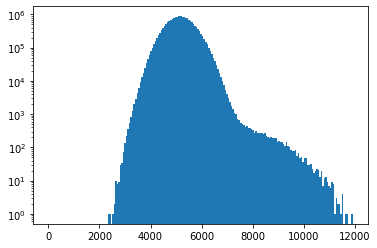

In [35]:
import napari
from napari.utils import nbscreenshot
from tifffile import imread

from matplotlib.pyplot import hist
import matplotlib.pyplot as plt
import numpy as np

i = 3
print(files[i])
fish1 = imread(files[i])
viewer = napari.view_image(fish1)
#100% intenstiy for the max range
max100 = np.percentile(fish1.flatten(),100)
ax = hist(fish1.flatten(),bins=200,range=(0,max100))
plt.yscale('log')
    
#crop the image for faster processing
#fish1 = fish1[40:50,100:300,100:300]


#viewer.dims.ndisplay = 3
#print("file dimension: (z,y,x)",viewer.layers['original'].data.shape)

## Remove background
Use skimage.morphology.white_tophat

The white top hat of an image is defined as the image minus its morphological opening. This operation returns the bright spots of the image that are smaller than the footprint.

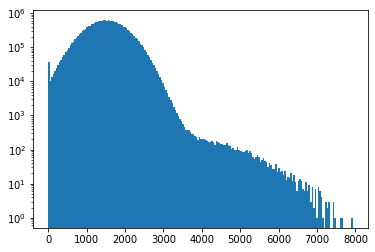

In [38]:
from skimage.morphology import white_tophat, ball
#bg_subtracted_image = white_tophat(fish1, ball(10))

#viewer.add_image(bg_subtracted_image, name='remove_bg')
#100% intenstiy for the max range
max100 = np.percentile(bg_subtracted_image.flatten(),100)
ax = hist(bg_subtracted_image.flatten(),bins=200,range=(0,max100))
plt.yscale('log')

## Remove noise
Use skimage.filters.median

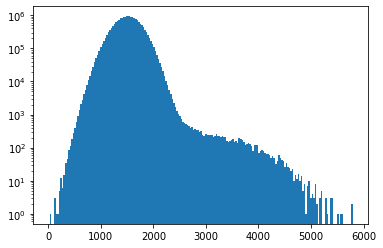

In [39]:
from skimage.filters import median
#median_filtered = median(bg_subtracted_image,ball(1))
#viewer.add_image(median_filtered, name='filtered')
#100% intenstiy for the max range
max100 = np.percentile(median_filtered.flatten(),100)
ax = hist(median_filtered.flatten(),bins=200,range=(0,max100))
plt.yscale('log')